In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [325]:
#must read
# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [83]:
ny= pd.read_csv("ny_home_ownership_rate.csv",parse_dates=[2])

In [60]:
ny.head()

,realtime_start,realtime_end,date,value
0,2019-12-06,2019-12-06,1984-01-01,51.1
1,2019-12-06,2019-12-06,1985-01-01,50.3
2,2019-12-06,2019-12-06,1986-01-01,51.3
3,2019-12-06,2019-12-06,1987-01-01,52.0
4,2019-12-06,2019-12-06,1988-01-01,50.7


In [24]:
ny["date"]

0    1984-01-01
1    1985-01-01
2    1986-01-01
3    1987-01-01
4    1988-01-01
5    1989-01-01
6    1990-01-01
7    1991-01-01
8    1992-01-01
9    1993-01-01
10   1994-01-01
11   1995-01-01
12   1996-01-01
13   1997-01-01
14   1998-01-01
15   1999-01-01
16   2000-01-01
17   2001-01-01
18   2002-01-01
19   2003-01-01
20   2004-01-01
21   2005-01-01
22   2006-01-01
23   2007-01-01
24   2008-01-01
25   2009-01-01
26   2010-01-01
27   2011-01-01
28   2012-01-01
29   2013-01-01
30   2014-01-01
31   2015-01-01
32   2016-01-01
33   2017-01-01
34   2018-01-01
Name: date, dtype: datetime64[ns]

In [22]:
ny.info()  #date  35 non-null datetime64[ns]  we used parse_dates=[2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   realtime_start  35 non-null     object        
 1   realtime_end    35 non-null     object        
 2   date            35 non-null     datetime64[ns]
 3   value           35 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.2+ KB


In [12]:
ny=ny.drop(columns=["realtime_start","realtime_end"])

In [15]:
ny.shape

(35, 2)

In [29]:
ny.index=pd.to_datetime(ny.date)

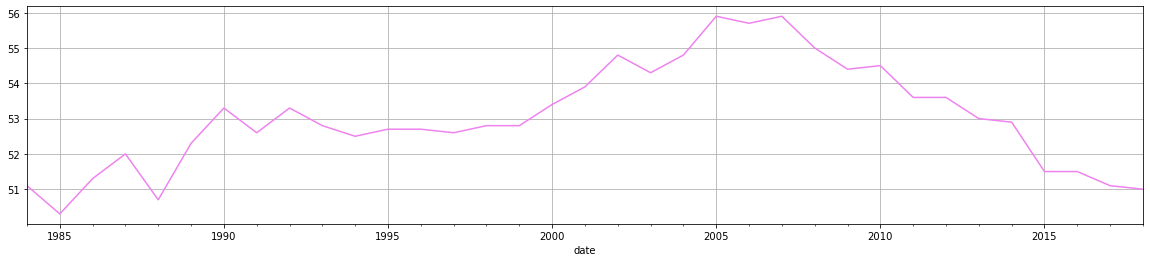

In [30]:
ny["value"].plot(figsize=(20,4), color="violet", grid =True)

# Checking for seasonality using the adfuller test

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
def adfuller_test(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [34]:
adfuller_test(ny["value"])

ADF Test Statistic : -1.7359311023835924
p-value : 0.4127012003366328
#Lags Used : 5
Number of Observations Used : 29
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [35]:
#CHECK FOR SEASONALITY

In [36]:
#p-value : 0.4127012003366328  dont show seasonality so we dont have to do differencing

# Data Visualization Zooming in

In [37]:
from matplotlib import pyplot as plt
%matplotlib inline

In [38]:
Dataviz_df = ny.copy()

In [39]:
Dataviz_df.head(10)

,realtime_start,realtime_end,date,value
date,,,,
1984-01-01,2019-12-06,2019-12-06,1984-01-01,51.1
1985-01-01,2019-12-06,2019-12-06,1985-01-01,50.3
1986-01-01,2019-12-06,2019-12-06,1986-01-01,51.3
1987-01-01,2019-12-06,2019-12-06,1987-01-01,52.0
1988-01-01,2019-12-06,2019-12-06,1988-01-01,50.7
1989-01-01,2019-12-06,2019-12-06,1989-01-01,52.3
1990-01-01,2019-12-06,2019-12-06,1990-01-01,53.3
1991-01-01,2019-12-06,2019-12-06,1991-01-01,52.6
1992-01-01,2019-12-06,2019-12-06,1992-01-01,53.3


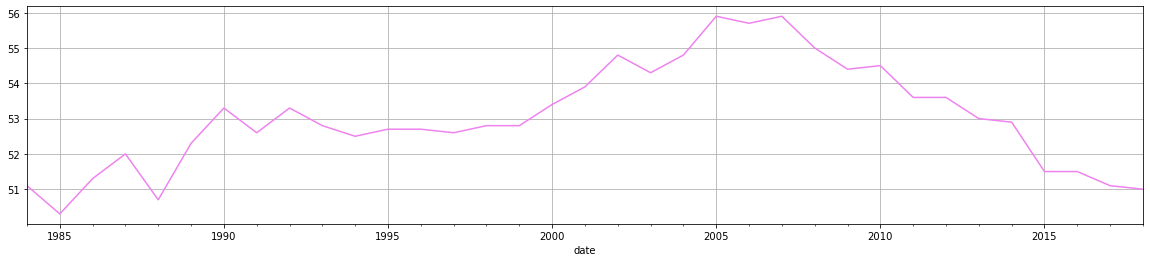

In [352]:
Dataviz_df['value'].plot(figsize=(20,4), color="violet", grid =True)

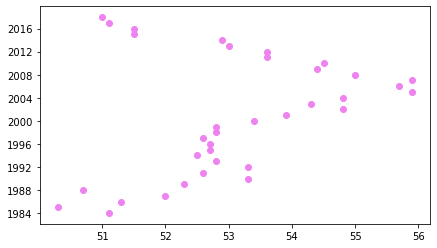

In [353]:
plt.scatter(ny["value"],ny.index, color="violet")

# Trendline

In [48]:
import seaborn as sns

In [49]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 1984-01-01 to 2018-01-01
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   realtime_start  35 non-null     object        
 1   realtime_end    35 non-null     object        
 2   date            35 non-null     datetime64[ns]
 3   value           35 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.4+ KB


In [61]:
ny=ny.drop(columns=["realtime_start","realtime_end", "date"])

In [64]:
ny.head()

,value
0,51.1
1,50.3
2,51.3
3,52.0
4,50.7


In [65]:
ny.reset_index()

,index,value
0,0,51.1
1,1,50.3
2,2,51.3
3,3,52.0
4,4,50.7
5,5,52.3
6,6,53.3
7,7,52.6
8,8,53.3
9,9,52.8


In [66]:
plt.rcParams['figure.figsize']=(15,4)

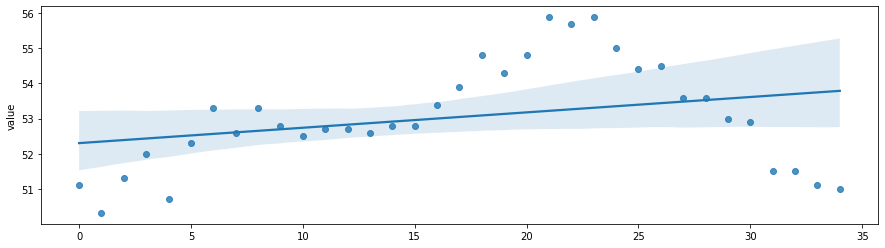

In [69]:
sns.regplot(x= ny.index, y=ny['value'])

# lag plot

In [70]:
plt.rcParams['figure.figsize']=(5,5)

In [71]:
from pandas.plotting import lag_plot
#by default uses lag 1

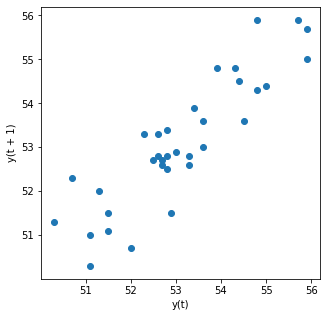

In [72]:
lag_plot(ny['value'])

In [75]:
#there is a coorelation betern the time series lag ... walk forward method can work

# Autocorelation plot

In [76]:
plt.rcParams['figure.figsize']=(17,5)

In [77]:
from pandas.plotting import autocorrelation_plot

In [78]:
# Aucorelation plot automatically calculates for all lag values the corelation values
#Lag values on X axis and it calucultes the cooresponding coorelation values in the Y
# for AARIMA nsd SARIMAX models this is important to know

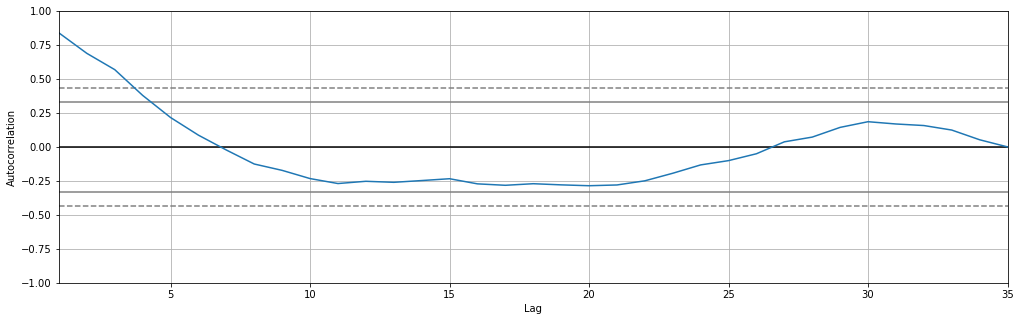

In [79]:
autocorrelation_plot(ny['value'])

In [80]:
#p = at 4  the confidence line is the grey line and it cuts at the point 4 LAG 4

# Decomposition of Series

**Additive Model** 

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model** 

y(t) = Level * Trend * Seasonality * Noise

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [84]:
ny=ny.drop(columns=["realtime_start","realtime_end"])

In [86]:
ny.index=ny["date"]


In [88]:
ny=ny.drop(columns=["date"])

In [89]:
ny.head()

,value
date,
1984-01-01,51.1
1985-01-01,50.3
1986-01-01,51.3
1987-01-01,52.0
1988-01-01,50.7


In [139]:
#MAKE SURE THE DF INDEX IS DATETIME SERIES

In [90]:
plt.rcParams['figure.figsize']=(7,4)

In [91]:
result_add = seasonal_decompose(ny['value'], model='additive')

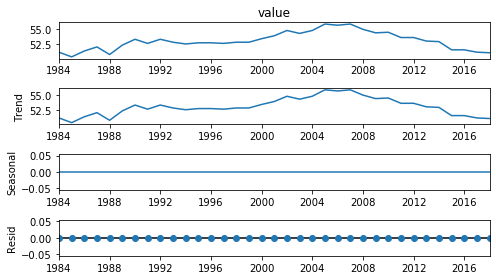

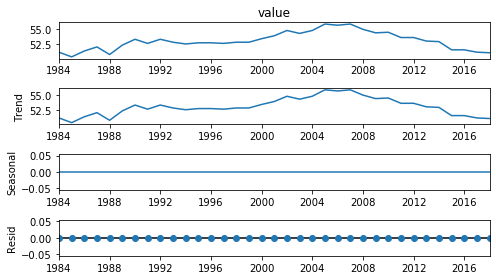

In [92]:
result_add.plot()

In [93]:
result_mult = seasonal_decompose((ny['value']), model='multiplicative')


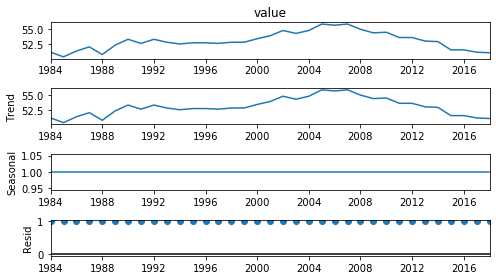

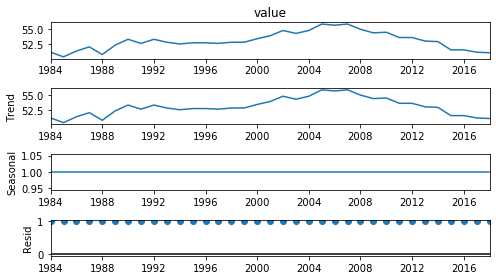

In [94]:
result_mult.plot()

# Differencing however there is no seasonality

In [95]:
# the series dont show much seasonality but lets check it for yearly seasonality that we do see at end of the year

In [96]:
# diff with a lag m = the seasonality , yearly M = 12 , weekly m = 7

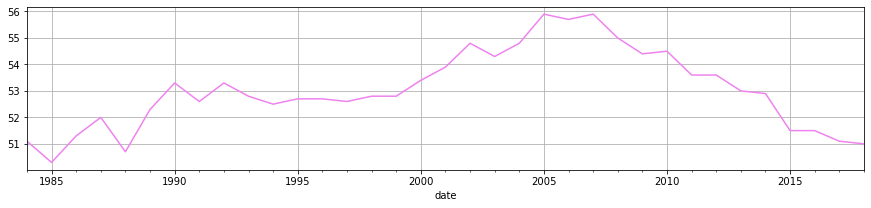

In [354]:
ny["value"].plot(figsize=(15,3), grid=True , color="violet")

In [357]:
ny["diff_12"]=ny["value"].diff(periods=1)

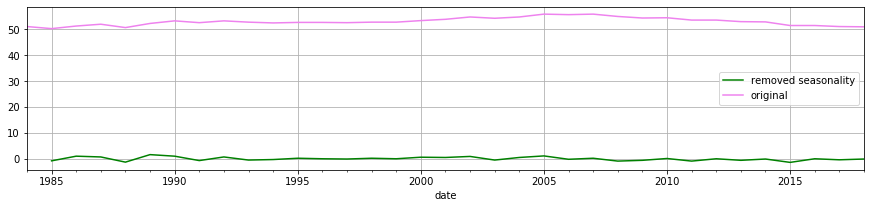

In [359]:
ny["diff_12"].plot(figsize=(15,3), grid=True , color="green" , label ="removed seasonality")
ny["value"].plot(figsize=(15,3), grid=True , color="violet" , label="original")
plt.legend()

In [105]:
#conclusion its probly not required

In [106]:
#SOME EQUATIONS AND EXPLAINATION

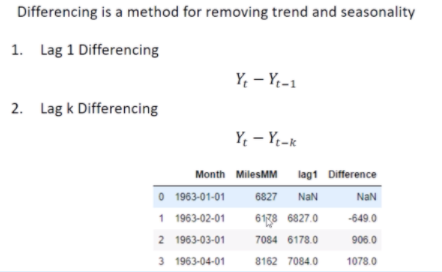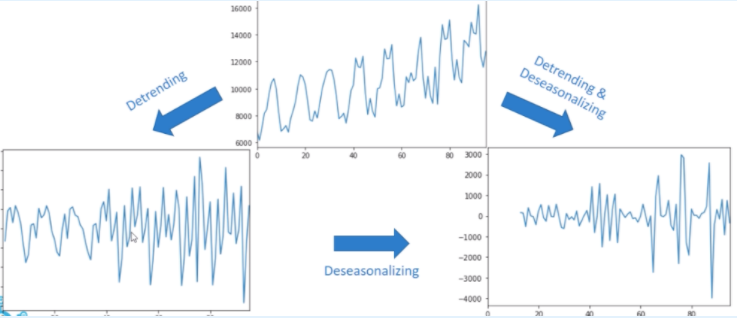

# Train Test Split in Time Series

In [107]:
ny.shape

(35, 2)

In [109]:
ny= ny.drop(columns=["diff_12"])

In [110]:
ny.tail

<bound method NDFrame.tail of             value
date             
1984-01-01   51.1
1985-01-01   50.3
1986-01-01   51.3
1987-01-01   52.0
1988-01-01   50.7
1989-01-01   52.3
1990-01-01   53.3
1991-01-01   52.6
1992-01-01   53.3
1993-01-01   52.8
1994-01-01   52.5
1995-01-01   52.7
1996-01-01   52.7
1997-01-01   52.6
1998-01-01   52.8
1999-01-01   52.8
2000-01-01   53.4
2001-01-01   53.9
2002-01-01   54.8
2003-01-01   54.3
2004-01-01   54.8
2005-01-01   55.9
2006-01-01   55.7
2007-01-01   55.9
2008-01-01   55.0
2009-01-01   54.4
2010-01-01   54.5
2011-01-01   53.6
2012-01-01   53.6
2013-01-01   53.0
2014-01-01   52.9
2015-01-01   51.5
2016-01-01   51.5
2017-01-01   51.1
2018-01-01   51.0>

In [148]:
#if you want to keep 30% as test

In [149]:
round(ny.shape[0]*30/100)

10

In [150]:
n=round(ny.shape[0]*30/100)
n

10

In [151]:
train, test = ny[1:ny.shape[0]-n], ny[ny.shape[0]-n:]

In [152]:
train.shape

(24, 1)

In [153]:
test.shape

(10, 1)

In [154]:
(10/(24+10))*100

29.411764705882355

In [155]:
train.head(5)

,value
date,
1985-01-01,50.3
1986-01-01,51.3
1987-01-01,52.0
1988-01-01,50.7
1989-01-01,52.3


## Simple AR AutoRegression Model

In [156]:
from statsmodels.tsa.ar_model import AR

In [157]:
model_ar=AR(train)

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWar

In [158]:
model_fit = model_ar.fit()

In [159]:
from sklearn.metrics import mean_squared_error


In [160]:
start=len(train)
start

24

In [161]:
end=len(train)+len(test)-1
end

33

In [162]:
predictions = model_fit.predict(start=24, end=33)

In [163]:
len(predictions)

10

In [164]:
len(test)

10

In [165]:
test

,value
date,
2009-01-01,54.4
2010-01-01,54.5
2011-01-01,53.6
2012-01-01,53.6
2013-01-01,53.0
2014-01-01,52.9
2015-01-01,51.5
2016-01-01,51.5
2017-01-01,51.1


In [166]:
predictions

2009-01-01    54.874732
2010-01-01    55.078750
2011-01-01    54.990866
2012-01-01    55.021471
2013-01-01    55.243332
2014-01-01    55.458489
2015-01-01    55.869757
2016-01-01    56.018164
2017-01-01    56.093367
2018-01-01    56.205202
Freq: AS-JAN, dtype: float64

In [167]:
mse=(mean_squared_error(test, predictions))

In [168]:
mse

10.763024260082053

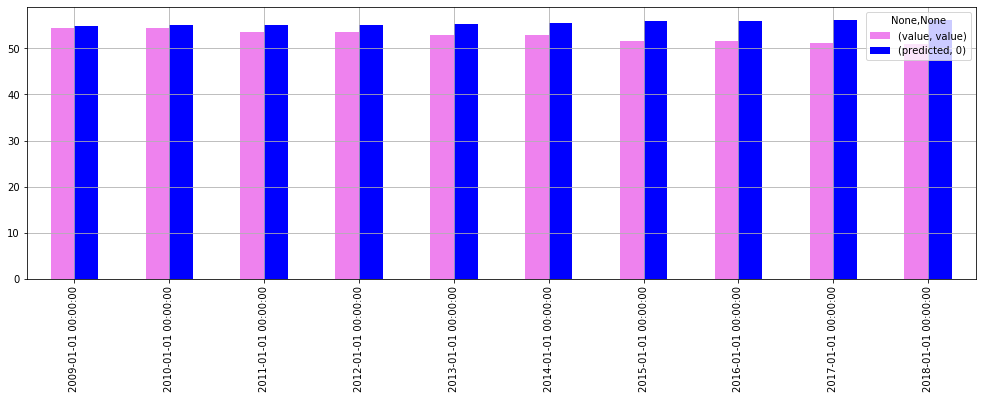

In [360]:
pd.concat([test,predictions], axis=1, keys=["value","predicted"] ).plot(kind="bar", \
                                                    figsize=(17,5), grid=True, color=["violet", "blue"])

# TimeSeries ARIMA

In [287]:
#Auto Regression Integreted Moving Average

In [288]:
#PDQ

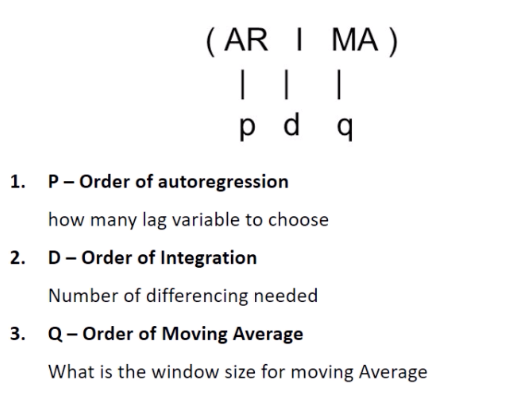

# Finding P Q D  values for ARIMA

In [291]:
#DIFFERENCING = D

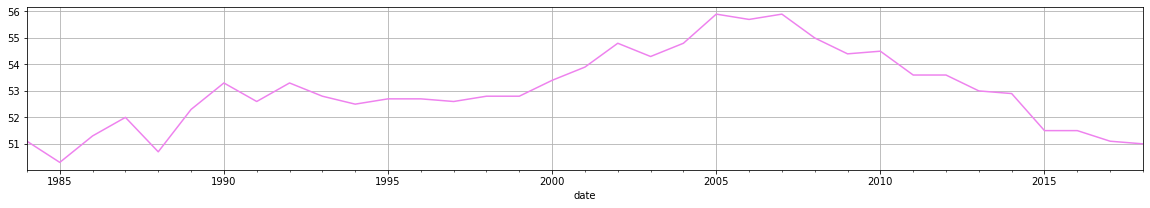

In [361]:
ny["value"].plot(figsize=(20,3), color="violet" , grid=True)  #linera trend D=1 , for quadratic trend D=2
#here its linear d=1

# Partial Autocorrelation Graph

In [171]:
#finding Q from partial AutoCorelation

#Q = ORDER OF MOVING AVERAGES

In [172]:
from statsmodels.graphics.tsaplots import plot_pacf

In [173]:
# q = 2  .. the blue block is the confidence interval and 
# at 2 the autorelation line if u connect the blue dots crossed the confidence interval

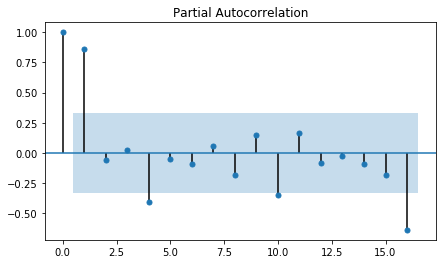

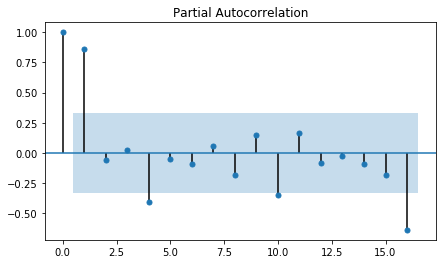

In [178]:
plot_pacf(ny['value'])

# Auto corelation plot to find p

In [176]:
#p=4  #NO OF LAG VALUES

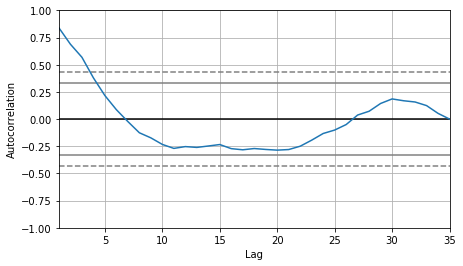

In [174]:
autocorrelation_plot(ny['value'])

# #ARIMA model

In [292]:
from statsmodels.tsa.arima_model import ARIMA

In [293]:
#order=p d q  p=0,d=1,q=1 

In [294]:
model = ARIMA(ny["value"], order =(4,1,2))

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferr

In [295]:
model_fit = model.fit()

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  w

In [296]:
model_fit.summary()

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                   34
Model:                 ARIMA(4, 1, 2)   Log Likelihood                 -32.477
Method:                       css-mle   S.D. of innovations              0.578
Date:                Sun, 13 Dec 2020   AIC                             80.954
Time:                        04:10:35   BIC                             93.165
Sample:                    01-01-1985   HQIC                            85.119
                         - 01-01-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0259      0.118      0.219      0.827      -0.206       0.257
ar.L1.D.value    -0.6256      0.195     -3.209      0.001      -1.008      -0.244
ar.L2.D.value    -0.6877      0.211     -3.264      0.001      -1.101      -0.275
ar.L3.D.value     0.2167      0.214      1.010      0.312      -0.204       0.637
ar.L4.D.value    -0.0622      0.197     -0.316      0.752      -0.448       0.324
ma.L1.D.value     0.5790        nan        nan        nan         nan         nan
ma.L2.D.value     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5147           -0.9145j            1.0494           -0.3316
AR.2           -0.5147           +0.9145j            1.0494            0.3316
AR.3            2.2555           -3.0829j            3.8199           -0.1495
AR.4            2.2555           +3.0829j            3.8199            0.1495
MA.1           -0.2895           -0.9572j            1.0000           -0.2967
MA.2           -0.2895           +0.9572j            1.0000            0.2967
-----------------------------------------------------------------------------
"""

# Checking residuals

In [373]:
#residual patterns should be looking like white nosise

In [374]:
# if Residual have any pattern we can improve the model

In [297]:
model_fit.resid

date
1985-01-01   -0.825871
1986-01-01    0.793840
1987-01-01    0.826477
1988-01-01   -0.858365
1989-01-01    0.900362
1990-01-01    1.132747
1991-01-01    0.060290
1992-01-01   -0.412427
1993-01-01   -0.552451
1994-01-01    0.649283
1995-01-01   -0.464270
1996-01-01   -0.277955
1997-01-01    0.557504
1998-01-01   -0.040191
1999-01-01   -0.447114
2000-01-01    0.980484
2001-01-01    0.626251
2002-01-01    0.367104
2003-01-01   -0.543239
2004-01-01    0.649553
2005-01-01    0.985097
2006-01-01   -0.197242
2007-01-01   -0.155179
2008-01-01   -0.908073
2009-01-01   -0.320791
2010-01-01    0.012800
2011-01-01   -0.808627
2012-01-01   -0.036849
2013-01-01   -0.559323
2014-01-01    0.017940
2015-01-01   -1.472902
2016-01-01   -0.059022
2017-01-01   -0.016262
2018-01-01   -0.044202
dtype: float64

In [298]:
residuals=model_fit.resid

In [299]:
residuals

date
1985-01-01   -0.825871
1986-01-01    0.793840
1987-01-01    0.826477
1988-01-01   -0.858365
1989-01-01    0.900362
1990-01-01    1.132747
1991-01-01    0.060290
1992-01-01   -0.412427
1993-01-01   -0.552451
1994-01-01    0.649283
1995-01-01   -0.464270
1996-01-01   -0.277955
1997-01-01    0.557504
1998-01-01   -0.040191
1999-01-01   -0.447114
2000-01-01    0.980484
2001-01-01    0.626251
2002-01-01    0.367104
2003-01-01   -0.543239
2004-01-01    0.649553
2005-01-01    0.985097
2006-01-01   -0.197242
2007-01-01   -0.155179
2008-01-01   -0.908073
2009-01-01   -0.320791
2010-01-01    0.012800
2011-01-01   -0.808627
2012-01-01   -0.036849
2013-01-01   -0.559323
2014-01-01    0.017940
2015-01-01   -1.472902
2016-01-01   -0.059022
2017-01-01   -0.016262
2018-01-01   -0.044202
dtype: float64

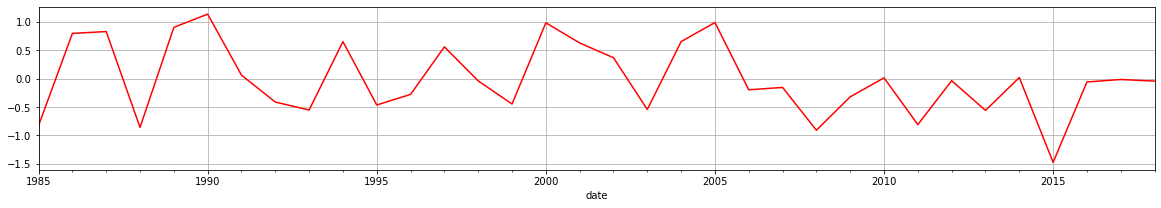

In [350]:
residuals.plot(figsize=(20,3), color="red" , grid=True)


In [301]:
residuals.describe()

count    34.000000
mean     -0.012959
std       0.647507
min      -1.472902
25%      -0.459981
50%      -0.042197
75%       0.609064
max       1.132747
dtype: float64

In [333]:
#other variations or Arima

### Variations
* **ARIMA** - <br />
    model = ARIMA(df['Sales'], order=(q,d,p)) <br />
* **Autoregression** - <br />
    model = ARIMA(df['Sales'], order=(p,d,0)) <br />
* **Moving Avaerage Model** - <br />
    model = ARIMA(df['Sales'], order=(0,d,q)) <br />

# FORECAST using Arima

In [302]:
output = model_fit.forecast()

In [303]:
#Forcast will give 3 values 0 = the forcasted value , 1 = std deviation , 2 = 90% confidence interval

In [304]:
output

(array([51.43874435]),
 array([0.57821457]),
 array([[50.30546462, 52.57202408]]))

In [305]:
output[0]  #for next period

array([51.43874435])

In [306]:
output_5 = model_fit.forecast(5)[0]

In [307]:
ny["value"].tail(5)

date
2014-01-01    52.9
2015-01-01    51.5
2016-01-01    51.5
2017-01-01    51.1
2018-01-01    51.0
Name: value, dtype: float64

In [308]:
output_5

array([51.43874435, 51.15802782, 51.0910013 , 51.48310871, 51.25163492])

In [309]:
full=pd.concat([ny["value"],pd.Series(output_5)],axis=0)

In [310]:
full=full.reset_index()

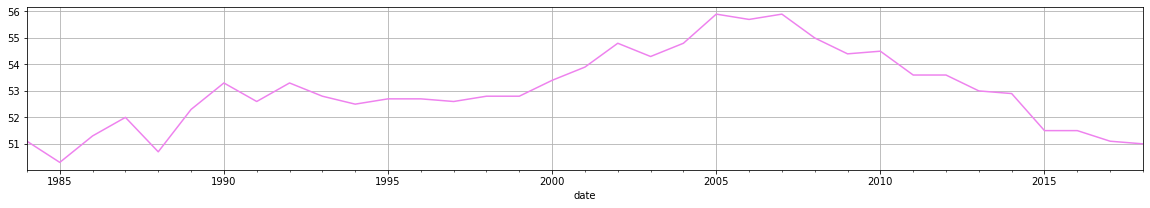

In [364]:
ny["value"].plot(figsize=(20,3), color="violet",grid=True)

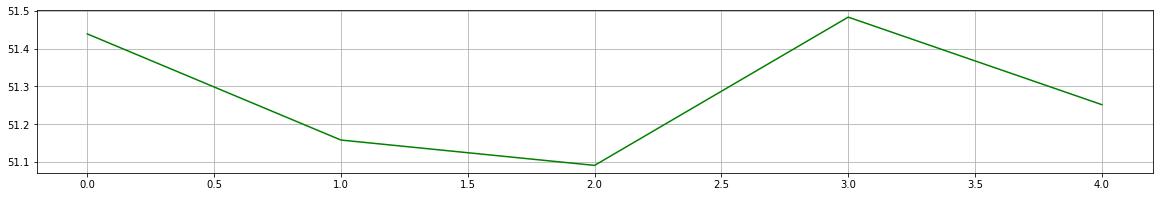

In [312]:
pd.Series(output_5).plot(figsize=(20,3), color="green",grid=True)

In [313]:
z=ny["value"].reset_index()
z=z.drop(columns=["date"])

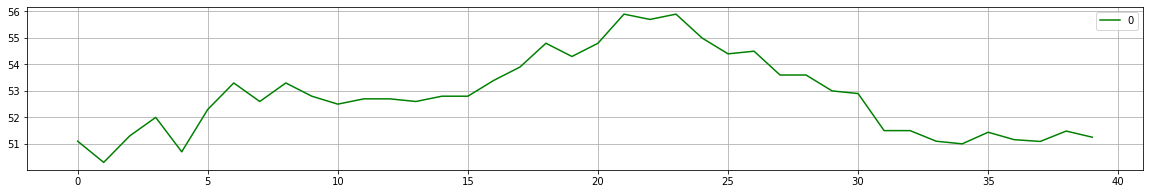

In [346]:
full.plot(figsize=(20,3), color="green",grid=True)


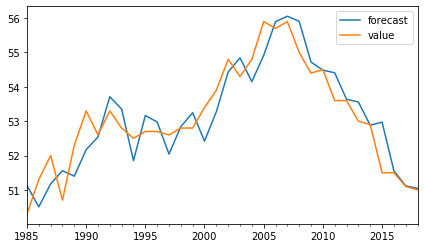

In [342]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [333]:
ny.shape

(35, 1)

# SARIMA

In [343]:
import statsmodels.api as sm

	
SARIMA(p,d,q)(P,D,Q)m

* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

**Seasonal Elements** -   
There are four seasonal elements that are not part of ARIMA that must be configured; they are:  

* P: Seasonal autoregressive order.    1 sesonality lag , yearly =1
* D: Seasonal difference order.   desonalize diff number
* Q: Seasonal moving average order. 
* m: The number of time steps for a single seasonal period.   if yearly 12 monthly data , m = 7 for weekly 

In [245]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [246]:
ny.head()

,value
date,
1984-01-01,51.1
1985-01-01,50.3
1986-01-01,51.3
1987-01-01,52.0
1988-01-01,50.7


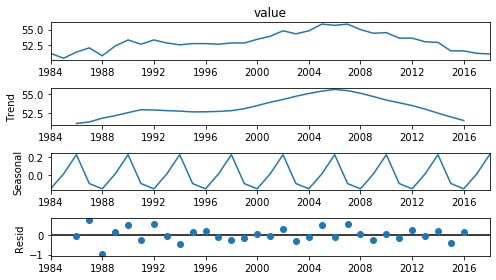

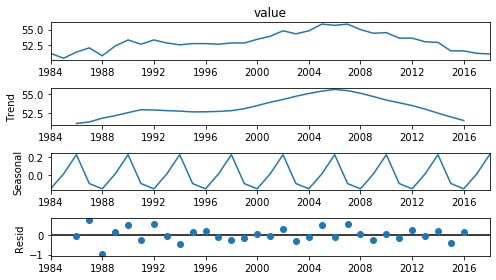

In [247]:
result = seasonal_decompose(ny["value"], model ="additive", period=4)
result.plot()

In [251]:
model_sm = SARIMAX(ny['value'], order=(4,1,2), seasonal_order=(1,1,4,12))

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [252]:
model_sm_fit=model_sm.fit()

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [253]:
residuals_sm=model_sm_fit.resid

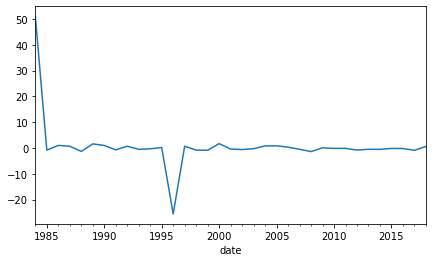

In [255]:
residuals_sm.plot()

In [397]:
#this looks like white noise and is GOOD compared to ARIMA resid

In [398]:
# Good indicater its centered to 0

# Forecast Sarima

In [256]:
output_sm = model_sm_fit.forecast()
output_sm

2019-01-01    51.252656
Freq: AS-JAN, dtype: float64

In [257]:
output_sm[0]

51.252656056664

In [259]:
ny["value"].tail(5)

date
2014-01-01    52.9
2015-01-01    51.5
2016-01-01    51.5
2017-01-01    51.1
2018-01-01    51.0
Name: value, dtype: float64

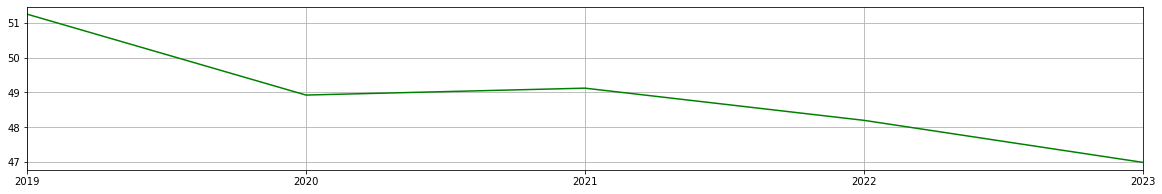

In [345]:
model_sm_fit.forecast(5).plot(figsize=(20,3), color="green",grid=True)


In [262]:
forecast_sm=model_sm_fit.forecast(5)

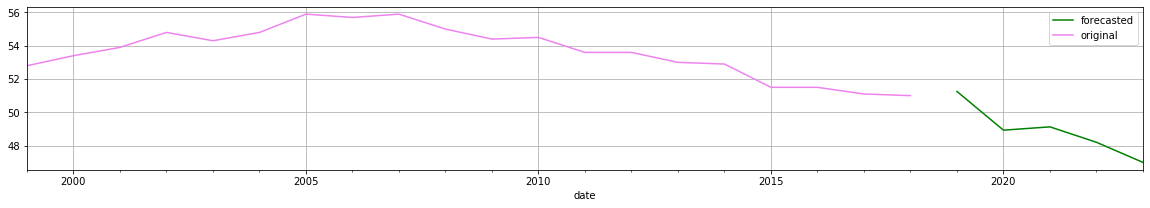

In [362]:
forecast_sm.plot(figsize=(20,3), color="green",grid=True , label="forecasted")
ny["value"].tail(20).plot(figsize=(20,3), color="violet",grid=True, label="original")
plt.legend()

# check prediction

In [267]:
yhat=model_sm_fit.predict() # if no end start given it takes all

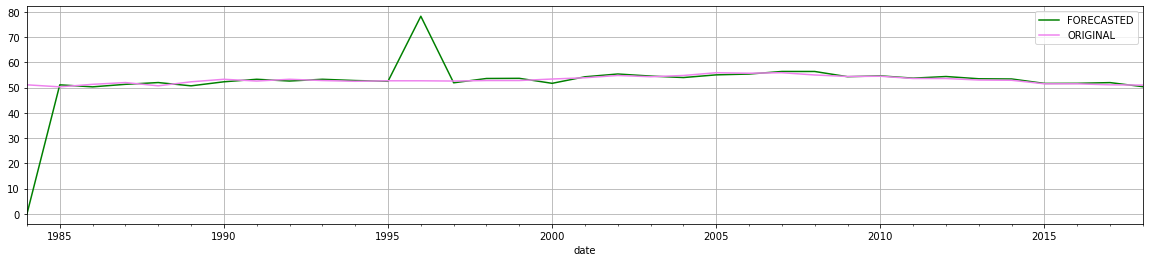

In [363]:
yhat.plot(figsize=(20,4), color="green",grid=True, label="FORECASTED" )
ny["value"].plot(figsize=(20,4), color="violet",grid=True, label="ORIGINAL")
plt.legend()

In [456]:
#MEAN SQ ERROR

In [269]:
mse=(mean_squared_error(ny["value"], yhat))

In [270]:
mse

93.83483225547772

# WalkForward

In [ ]:
train, test = retail.value[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]